In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_excel('http://taanila.fi/data1.xlsx')

In [2]:
df.shape

(82, 16)

In [3]:
df.columns

Index(['nro', 'sukup', 'ikä', 'perhe', 'koulutus', 'palveluv', 'palkka',
       'johto', 'työtov', 'työymp', 'palkkat', 'työteht', 'työterv', 'lomaosa',
       'kuntosa', 'hieroja'],
      dtype='object')

In [4]:
df.columns = ['nro', 'sukupuoli', 'ikä', 'perhe', 'koulutus', 'palveluvuodet', 'palkka',
       'johto', 'työtov', 'työymp', 'palkkat', 'työteht', 'työterv', 'lomaosa',
       'kuntosa', 'hieroja']

In [5]:
sukupuoli = ['Mies', 'Nainen']
koulutus = ['Perusaste', 'Toinen aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

In [6]:
df1 = df.groupby('sukupuoli')['palkka'].describe()
df1.index = sukupuoli
df1

,count,mean,std,min,25%,50%,75%,max
Mies,63.0,2663.746032,930.061860,1521.0,2086.0,2417.0,2925.0,6278.0
Nainen,19.0,2232.736842,340.780451,1715.0,1969.0,2144.0,2574.0,2729.0


In [7]:
df2 = df.drop(['nro', 'työterv', 'lomaosa',
       'kuntosa', 'hieroja'], axis=1)
df2.head()

,sukupuoli,ikä,perhe,koulutus,palveluvuodet,palkka,johto,työtov,työymp,palkkat,työteht
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [8]:
df2.corr()

,sukupuoli,ikä,perhe,koulutus,palveluvuodet,palkka,johto,työtov,työymp,palkkat,työteht
sukupuoli,1.000000,0.154505,0.249334,0.077620,0.143230,-0.215426,0.325442,-0.147959,0.348216,0.337999,0.174702
ikä,0.154505,1.000000,0.412914,-0.157863,0.531559,0.296872,0.120856,0.077554,0.101577,0.072114,0.187848
perhe,0.249334,0.412914,1.000000,0.049670,0.345915,0.239839,0.212600,0.090063,0.280548,0.214119,0.315220
koulutus,0.077620,-0.157863,0.049670,1.000000,-0.145238,0.422408,0.140477,-0.016793,0.296007,0.254002,0.158809
palveluvuodet,0.143230,0.531559,0.345915,-0.145238,1.000000,0.243139,0.073422,0.019732,0.126504,0.004420,0.143100
palkka,-0.215426,0.296872,0.239839,0.422408,0.243139,1.000000,0.174133,0.117468,0.267615,0.314889,0.307886
johto,0.325442,0.120856,0.212600,0.140477,0.073422,0.174133,1.000000,0.223328,0.584918,0.540228,0.456933
työtov,-0.147959,0.077554,0.090063,-0.016793,0.019732,0.117468,0.223328,1.000000,0.285940,0.086845,0.308939
työymp,0.348216,0.101577,0.280548,0.296007,0.126504,0.267615,0.584918,0.285940,1.000000,0.538940,0.576431
palkkat,0.337999,0.072114,0.214119,0.254002,0.004420,0.314889,0.540228,0.086845,0.538940,1.000000,0.479884


In [14]:
df3 = df[['johto', 'työtov', 'työymp', 'palkkat', 'työteht']].mean().to_frame('mean')
df3.round(2)

,mean
johto,3.06
työtov,4.06
työymp,3.22
palkkat,2.11
työteht,3.20


Text(0.5, 0, 'Tyytyväisyyden keskiarvo')

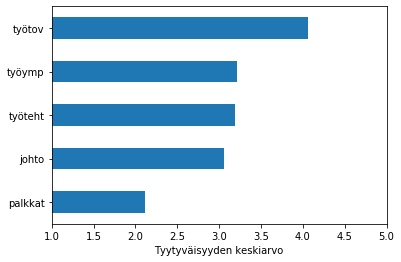

In [15]:
ax1 = df3.sort_values('mean').plot.barh(legend=False)
ax1.set_xlim(1,5)
ax1.set_xlabel('Tyytyväisyyden keskiarvo')

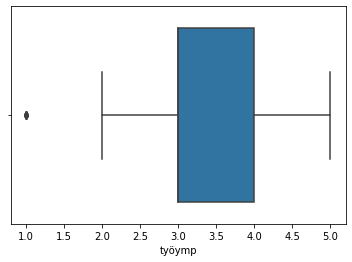

In [16]:
import seaborn as sns

sns.boxplot(df['työymp'])

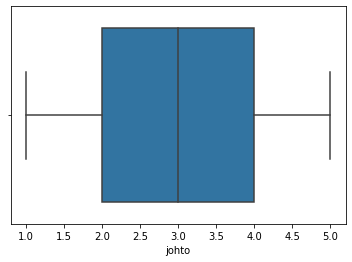

In [18]:
sns.boxplot(df['johto'])

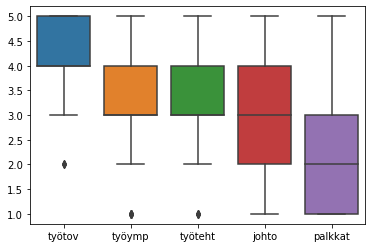

In [19]:
sns.boxplot(data=df[['työtov', 'työymp', 'työteht', 'johto', 'palkkat']])

In [21]:
df3 = df.groupby('koulutus')['palkka'].describe()
df3.index=koulutus
df3.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Perusaste,27,2310,473,1638,2008,2144,2534,3587
Toinen aste,30,2403,534,1521,2008,2378,2729,3510
Korkeakoulu,22,2887,1108,1559,2222,2710,2925,6278
Ylempi korkeakoulu,2,5147,110,5069,5108,5147,5186,5225


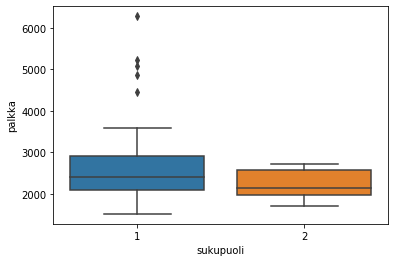

In [24]:
ax2 = sns.boxplot(x='sukupuoli', y='palkka', data=df)


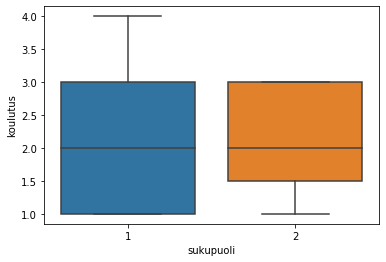

In [25]:
ax3 = sns.boxplot(x='sukupuoli', y='koulutus', data=df)


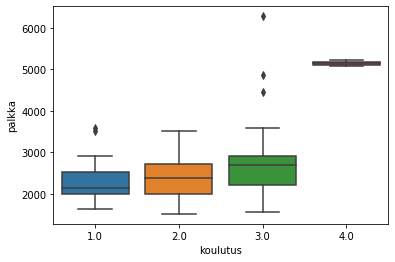

In [27]:
ax4 = sns.boxplot(x='koulutus', y='palkka', data=df)